Risultati del fit:
A = 0.0076 ± 0.0327
B = -0.0000 ± 0.0000
C = -0.0044 ± 0.1647
D = 0.0000 ± 0.0000
Q = 9757.3981 ± 477452.1047
fr = 3176609266.1821 ± 8837846.0835


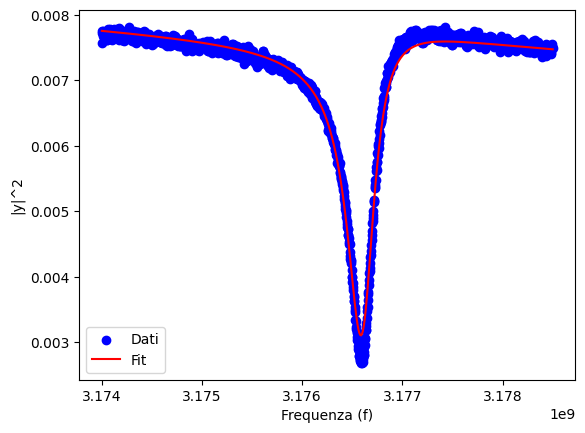

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares

# Funzione modello per il fit
def modello1(f, A, B, C, D, Q, fr):
    return A + B * (f - fr) + (C + D * (f - fr)) / (1 + 4 * Q**2 * ((f - fr) / fr)**2)

# Lettura dei dati da file
def leggi_dati_da_file(nome_file):
    # Si presuppone che il file abbia due colonne: la prima per le x (f) e la seconda per le y
    dati = np.loadtxt(nome_file, delimiter = ",")
    f = dati[:, 0]  # Prima colonna: frequenze
    x = dati[:, 1]
    y = dati[:, 2]  # Seconda colonna: valori y
    power = np.abs(x)**2 + np.abs(y)**2  # Calcolo del modulo quadro delle y
    return f, power

# Funzione per eseguire il fit
def esegui_fit(f, y_modulo_quadro):
    # Funzione di chi-quadro per il fit
    def chi_quadro(A, B, C, D, Q, fr):
        return np.sum(((y_modulo_quadro - modello1(f, A, B, C, D, Q, fr))**2))

    # Inizializzazione con parametri approssimati: [A, B, C, D, Q, fr]
    A_iniziale = 1.0
    B_iniziale = 1.0
    C_iniziale = 1.0
    D_iniziale = 1.0
    Q_iniziale = 10.0
    fr_iniziale = np.mean(f)

    # Impostazione del minimo con iminuit
    minuit = Minuit(chi_quadro, A=A_iniziale, B=B_iniziale, C=C_iniziale, D=D_iniziale, Q=Q_iniziale, fr=fr_iniziale)

    # Impostazione della strategia di minimizzazione (opzionale ma consigliata)
    minuit.errordef = Minuit.LEAST_SQUARES  # Definisce che stiamo minimizzando un chi-quadro

    # Esecuzione del fit
    minuit.migrad()  # Ottimizza i parametri
    minuit.hesse()   # Calcola le incertezze sui parametri

    # Risultati
    risultati = minuit.values  # Valori finali dei parametri
    errori = minuit.errors     # Errori sui parametri

    return risultati, errori

def modello2 (f, L, C, fr, phi, a) :
    return (np.abs(a)**2) * (1 + (((L/C)**2-4*((f-fr)/fr)*(L**2/C)*np.sin(phi)-2*(L/C)*np.cos(phi))/(1+4*L**2*((f-fr)/fr)**2)))

def esegui_fit2(f, y_modulo_quadro, params):
    # Funzione di chi-quadro per il fit
    def chi_quadro2(L, C, fr, phi, a):
        return np.sum(((y_modulo_quadro - modello2(f, L, C, fr, phi, a))**2))

    # Inizializzazione con parametri approssimati: [A, B, C, D, Q, fr]
    A_iniziale = 1.0
    B_iniziale = 1.0
    C_iniziale = 1.0
    D_iniziale = 1.0
    Q_iniziale = 10.0
    fr_iniziale = np.mean(f)

    # Impostazione del minimo con iminuit
    minuit = Minuit(chi_quadro2, L = params["Q"], C = B_iniziale, fr = params["fr"], phi = C_iniziale, a = D_iniziale)

    # Impostazione della strategia di minimizzazione (opzionale ma consigliata)
    minuit.errordef = Minuit.LEAST_SQUARES  # Definisce che stiamo minimizzando un chi-quadro

    # Esecuzione del fit
    minuit.migrad()  # Ottimizza i parametri
    minuit.hesse()   # Calcola le incertezze sui parametri

    # Risultati
    risultati = minuit.values  # Valori finali dei parametri
    errori = minuit.errors     # Errori sui parametri

    return risultati, errori

# Funzione principale
def main():
    # Leggere i dati dal file
    nome_file = "../data/Q_res20.txt"  # Sostituisci con il nome del tuo file
    f, y_modulo_quadro = leggi_dati_da_file(nome_file)

    # Esegui il fit
    risultati, errori = esegui_fit(f, y_modulo_quadro)

    risultati2, errori2 = esegui_fit2(f, y_modulo_quadro, risultati)

    # Stampa dei risultati
    print("Risultati del fit:")
    parametri = ["L", "C", "fr", "phi", "a"]
    for parametro in parametri:
        print(f"{parametro} = {risultati2[parametro]:.4f} ± {errori2[parametro]:.4f}")

    # Plot dei dati e del fit
    plt.scatter(f, y_modulo_quadro, label='Dati', color='blue')

    # Curva del fit usando i parametri ottimizzati
    f_fit = np.linspace(min(f), max(f), 500)
    # Passa i singoli valori dal dizionario risultati
    y_fit = modello2(f_fit, risultati["L"], risultati["C"], risultati["fr"], risultati["phi"], risultati["a"])
    plt.plot(f_fit, y_fit, label='Fit', color='red')

    plt.xlabel('Frequenza (f)')
    plt.ylabel('|y|^2')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
